In [1]:
# Python Disease X Model Simulation
# Susceptible Exposed Infectious Recovered (SEIR)
# Source = https://hackernoon.com/simulating-infectious-disease-spread-with-python-sir-and-seir-models
# Source Author = Olaoluwa Afolabi

In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# SEIR Model Equations
def SEIR_Model(y, t, sigma, beta, gamma):
    S,E,I,R=y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [4]:
# Initial Conditions
# I modified the initial conditions and simulation duration,t, so that the resultant chart would clearly display the peak infection
S0=0.25 # 25% of the population is Susceptible to Disease X at simulation start/time 0
E0=0.05 # Initial Exposure rate is 1% at time 0
I0=0.00 # 0% or no individuals are infected at time 0 
R0=0.00 # 0% or no individuals have recovered from Disease X at time 0
y0 = [S0, E0,I0,R0]

In [5]:
# Model Parameters
beta=0.3
gamma=0.1
sigma=0.2

In [6]:
#Time Vector
t = np.linspace(0 , 50, 50) #Simulate for 50 days

In [7]:
#Solve the SIR model equations using odeint()
solution = odeint(SEIR_Model, y0, t, args=(beta, sigma, gamma))

In [8]:
#Extract Results
S,E,I,R = solution.T

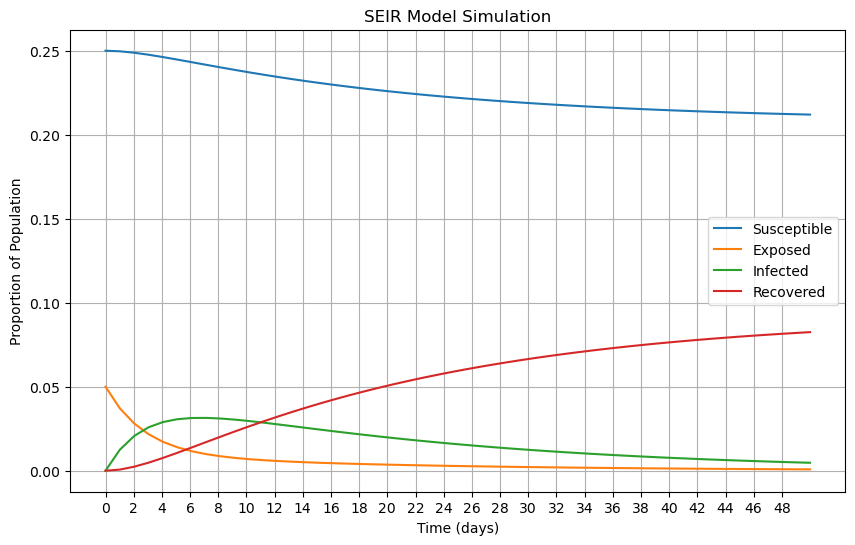

In [9]:
# Plot the results
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SEIR Model Simulation')
plt.xticks(np.arange(0, 50, 2))
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Note: The approximate infection peak is 7 days in this SEIR model simulation